In [55]:
import kagglehub
dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')

print('Data source import complete.')
import shutil
import os

destination = "news"
# Check if the destination folder already exists
if not os.path.exists(os.path.join(destination, 'fake-and-real-news-dataset')):
    shutil.move(dataset_path, destination)
    print(f"Dataset moved to {destination}")
else:
    print(f"Dataset already exists in {destination}")
print('Data source import complete.')
import shutil
import os

destination = "news"
# Check if the destination folder already exists
if not os.path.exists(os.path.join(destination, 'fake-and-real-news-dataset')):
    shutil.move(dataset_path, destination)
    print(f"Dataset moved to {destination}")
else:
    print(f"Dataset already exists in {destination}")

Data source import complete.
Dataset already exists in news
Data source import complete.
Dataset already exists in news


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [10]:
path_fake_data = "news/Fake.csv"
path_true_data = "news/True.csv"

In [11]:
fake_news = pd.read_csv(path_fake_data)
true_news = pd.read_csv(path_true_data)

In [12]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [15]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [16]:
fake_news.duplicated().sum(), true_news.duplicated().sum()

(np.int64(3), np.int64(206))

In [17]:
true_news.drop_duplicates(inplace=True)
fake_news.drop_duplicates(inplace=True)

In [18]:
true_news["target"] = 1
fake_news["target"] = 0

In [19]:
print(f"There are {len(true_news)} texts\n")
print(f"The first 1 texts are these:\n")
print(true_news["text"][0])

There are 21211 texts

The first 1 texts are these:

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “dis

In [20]:
print(f"There are {len(fake_news)} texts\n")
print(f"The first 1 texts are these:\n")
print(fake_news["text"][0])

There are 23478 texts

The first 1 texts are these:

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile

In [21]:
import re
from bs4 import BeautifulSoup
import string
import random
import spacy as sp
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
true_news.drop(["subject", "date", "title"], axis=1, inplace=True)
fake_news.drop(["subject", "date", "title"], axis=1, inplace=True)

In [23]:
total_news = 2000
fake_news = fake_news[:total_news]
true_news = true_news[:total_news]
len(fake_news), len(true_news)

(2000, 2000)

In [24]:
news = pd.concat([true_news, fake_news], ignore_index=True)
news = news.sample(frac=1, random_state=42).reset_index(drop=True)
news.head()

,text,target
0,NEW YORK (Reuters) - Haitian immigrants on Tue...,1
1,Remember when Republicans were told to stop ta...,0
2,WASHINGTON (Reuters) - Republican Senator Rand...,1
3,Democratic National Committee Chairman Tom Per...,0
4,Republican Senator Rand Paul spoke with CNN s ...,0


In [25]:
unics, counts = np.unique(news['target'], return_counts=True)
unics, counts

(array([0, 1]), array([2000, 2000]))

In [26]:
nlp = sp.load("en_core_web_sm")
stop_words = sp.lang.en.STOP_WORDS

In [27]:
def preprocessing(text):
    """

    Args:
      text: texts (str type) with stop words, unwanted characters and punctuations

    Returns:
      clean texts without stop words and punctuation

    """
    text = BeautifulSoup(text, "lxml").get_text()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text).strip()
    text = re.sub(r"  +", " ", text).strip()
    text = text.lower()
    doc = nlp(text)
    words = [token.text for token in doc if not token.is_stop and token.text not in string.punctuation]
    text = " ".join(words)

    return text

In [28]:
test = news["text"][1]
test

'Remember when Republicans were told to stop talking about rape because they were repeatedly sticking their foot in their mouths? Well, now they are being told to stop talking about their attempt to repeal the Affordable Care Act.Ever since Republicans giddily started preparing to repeal the landmark healthcare law, they faced a sea of angry constituents at town hall events across the country. As the GOP dug in their heels to strip healthcare from millions of Americans, their own voting base began to realize that their own healthcare was threatened as well and that the law they referred to as Obamacare wasn t so bad after all.In fact, many realize that the law saved their lives and they don t want Republicans to repeal it and put their lives back in jeopardy.But Republicans shoved their bill through the House without even reading it and getting the CBO to score it. The bill lets states opt out of requiring insurance companies to cover people with pre-existing conditions, which have now

In [29]:
print(preprocessing(test))

remember republicans told stop talking rape repeatedly sticking foot mouths told stop talking attempt repeal affordable care act republicans giddily started preparing repeal landmark healthcare law faced sea angry constituents town hall events country gop dug heels strip healthcare millions americans voting base began realize healthcare threatened law referred obamacare wasn t bad fact realize law saved lives don t want republicans repeal lives jeopardy republicans shoved bill house reading getting cbo score bill lets states opt requiring insurance companies cover people pre existing conditions defined including sexual assault pregnancy cancer acne asthma diabetes sleep apnea alzheimer s disease host conditions medical problems list find pretty allow insurance companies discriminate millions americans conservatives included bill slashed billion medicaid covers millions low income americans order fund tax gift wealthy millions americans including conservatives red states got healthcare 

In [30]:
sentences = list(news["text"])
labels = list(news["target"])

In [31]:
sentences = [preprocessing(sentence) for sentence in sentences]

In [32]:
for _ in range(2):
  print(sentences[random.randint(0, len(news) -1 )])

donald trump stopped hawaii totally kenya en route country day trip asia wasn t love people republicans hold office state s seat house reality star won percent vote hawaii presidential election birther chief noticed welcome kenya signs greeted protesters trump dogged barack obama years floating birther conspiracy theory order delegitimize country s black president holy crap trump greeted welcome kenya signs hawaii pic twitter com q uxy vc holly o reilly november protesters schooled trump obama s birthplace welcome kenya growing crowd protests trump honolulu state capitol visit honolulu pic twitter com kntefjsvf jaweed kaleem november sign read bad bush look good aloha means goodbye read sign hawaiians forget trump tried discredit hawaii officials obama s birth certificate jeff sessions dismissed hawaii island pacific keith boykin november trump prison read man s t shirt vet called trump remarks disparaging sen john mccain s military service hawaii residents lot signs issues especially 

In [33]:
TRUNC='post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"
EMBEDDING = 120
EPOCHS = 4
TRAINING_SPLIT = 0.8
maxlen = max([len(sentence.split()) for sentence in sentences])

In [34]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets

    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set

    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """

    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return train_sentences, validation_sentences, train_labels, validation_labels

In [35]:
train_news, val_news, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_news)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_news)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 3200 sentences for training.

There are 3200 labels for training.

There are 800 sentences for validation.

There are 800 labels for validation.


In [36]:
def fit_tokenizer(train_sentences, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences

    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        oov_token (string) - symbol for the out-of-vocabulary token

    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """

    # Instantiate the Tokenizer class, passing in the correct values for oov_token
    tokenizer = Tokenizer(oov_token=oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [37]:
tokenizer = fit_tokenizer(sentences, OOV_TOKEN)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

In [38]:
def seq_pad_and_trunc(sentences, tokenizer, padding, truncating, maxlen):
    """
    Generates an array of token sequences and pads them to the same length

    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        truncating (string): type of truncating to use
        maxlen (int): maximum length of the token sequence

    Returns:
        pad_trunc_sequences (array of int): tokenized sentences padded to the same length
    """
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad the sequences using the correct padding, truncating and maxlen
    pad_trunc_sequences = pad_sequences(sequences, padding=padding, truncating=truncating, maxlen=maxlen)

    return pad_trunc_sequences

In [39]:
train_pad_trunc_seq = seq_pad_and_trunc(train_news, tokenizer, PADDING, TRUNC, maxlen)
val_pad_trunc_seq = seq_pad_and_trunc(val_news, tokenizer, PADDING, TRUNC, maxlen)

print(f"Padded and truncated training sequences have shape: {train_pad_trunc_seq.shape}\n")
print(f"Padded and truncated validation sequences have shape: {val_pad_trunc_seq.shape}")

Padded and truncated training sequences have shape: (3200, 791)

Padded and truncated validation sequences have shape: (800, 791)


In [40]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [42]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.99:
                print("\nReached 99% val_accuracy so cancelling training!")
                # Stop training when the above condition is met
                self.model.stop_training = True

In [43]:
def create_model(vocab_size, embedding_dim, maxlen):
    """
    Creates a binary sentiment classifier model

    Args:
        vocab_size (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    Returns:
        model (tf.keras Model): the sentiment classifier model
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [44]:
model = create_model(VOCAB_SIZE, EMBEDDING, maxlen)
callbacks = myCallback()

# Train the model and save the training history
history = model.fit(
    train_pad_trunc_seq, train_labels, epochs=EPOCHS,
    validation_data=(val_pad_trunc_seq, val_labels),
    callbacks=[callbacks]
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5024 - loss: 0.6927 - val_accuracy: 0.7950 - val_loss: 0.6184
Epoch 2/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7708 - loss: 0.5370 - val_accuracy: 0.8838 - val_loss: 0.2421
Epoch 3/4
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.2017 - val_accuracy: 0.9887 - val_loss: 0.0483
Epoch 4/4
 84/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1222
Reached 99% val_accuracy so cancelling training!
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9509 - loss: 0.1178 - val_accuracy: 0.9900 - val_loss: 0.0303


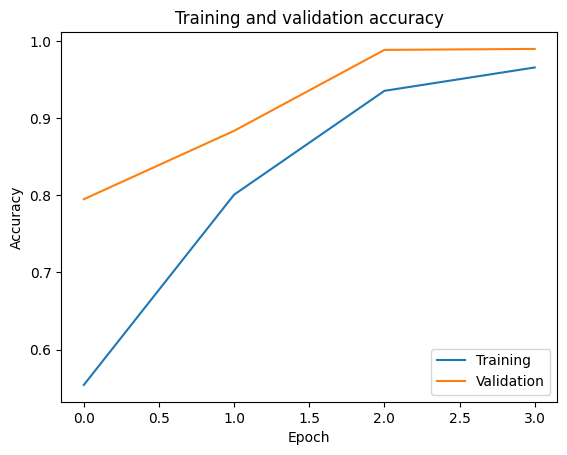

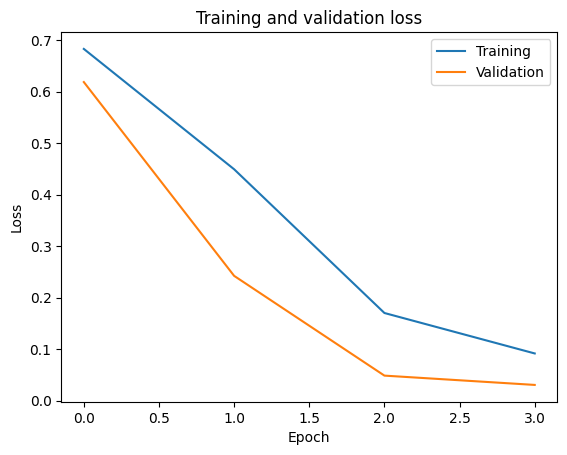

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [48]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample preprocessing function
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

# Assuming data is loaded into `news['text']` and `labels`
# Using news['text'] instead of undefined 'texts' variable
texts_cleaned = [preprocessing(text) for text in news['text']]
# Tokenization and padding
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(texts_cleaned)
sequences = tokenizer.texts_to_sequences(texts_cleaned)
maxlen = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Model building with dropout and regularization
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    Dropout(0.5),
    Bidirectional(LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    np.array(X_train), np.array(y_train), validation_split=0.2, epochs=20, batch_size=64, callbacks=[early_stopping]
)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.7168 - loss: 4.4326 - val_accuracy: 0.9953 - val_loss: 1.9634
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.9933 - loss: 1.6242 - val_accuracy: 0.9937 - val_loss: 0.7846
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 184ms/step - accuracy: 0.9976 - loss: 0.6272 - val_accuracy: 1.0000 - val_loss: 0.2856
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9987 - loss: 0.2354 - val_accuracy: 0.9828 - val_loss: 0.2560
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.9669 - loss: 0.3279 - val_accuracy: 0.9953 - val_loss: 0.1018
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.9990 - loss: 0.0693 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 1.0000 - loss: 0.0374 - val_accuracy: 1.0000 - val_loss: 0.0244
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9999 - loss: 0.0234 - val_accuracy: 1.0000 - 

In [58]:
def preprocess_and_predict(user_input):
    # Preprocess the input
    user_input_clean = preprocessing(user_input)

    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([user_input_clean])
    padded = pad_sequences(sequence, maxlen=maxlen, padding='post', truncating='post')

    # Predict
    prediction = model.predict(padded)

    # Interpret result
    label = "REAL" if prediction[0][0] > 0.5 else "FAKE"
    print(f"📰 Prediction: {label} news (Confidence: {prediction[0][0]:.2f})")

# Example: Run prediction with user input
user_input = input("Enter a news article or headline: ")
preprocess_and_predict(user_input)


Enter a news article or headline: Factbox: Trump on Twitter (Dec 28) - Vanity Fair, Hillary Clinton The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Vanity Fair, which looks like it is on its last legs, is bending over backwards in apologizing for the minor hit they took at Crooked H. Anna Wintour, who was all set to be Amb to Court of St James’s & a big fundraiser for CH, is beside herself in grief & begging for forgiveness! [1024 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
📰 Prediction: REAL news (Confidence: 1.00)
